<a href="https://colab.research.google.com/github/Hiteshshekhawat/ML.Reg_Mod/blob/main/SEOUL_BIKE_SHARING_DEMAND_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***PROJECT TITLE : SEOUL BIKE SHARING DEMAND PREDICTION***

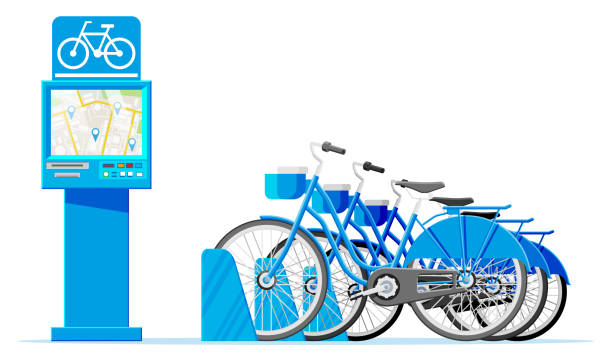

## PROBLEM DESCRIPTION

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. 

The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes

## DATA DESCRIPTION

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

Attribute Information:

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing drive into colab

from google.colab import drive
drive.mount('/content/drive')

#importing dataset 
Bike_df = pd.read_csv(r"/content/drive/MyDrive/SeoulBikeData.csv",encoding= 'unicode_escape')

Bike_df.head(3)

Mounted at /content/drive


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#unmounting google drive

drive.flush_and_unmount()

## KNOWING DATASET 

In [ ]:
#shape of dataset

print("number of rows and columns : ")
Bike_df.shape

number of rows and columns : 


(8760, 14)

In [ ]:
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
Bike_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [ ]:
Bike_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [ ]:
#unique values in dataset

Bike_df.nunique().sort_values(ascending = True)

Holiday                         2
Functioning Day                 2
Seasons                         4
Hour                           24
Snowfall (cm)                  51
Rainfall(mm)                   61
Wind speed (m/s)               65
Humidity(%)                    90
Solar Radiation (MJ/m2)       345
Date                          365
Temperature(°C)               546
Dew point temperature(°C)     556
Visibility (10m)             1789
Rented Bike Count            2166
dtype: int64

In [ ]:
#Null values in dataset

Bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
#duplicated values 

Bike_df.duplicated().sum()

0

### FEATURE ENGINEERING

In [ ]:
Bike_df['Date'] = pd.to_datetime(Bike_df['Date'])
Bike_df['Year'] = Bike_df['Date'].dt.year
Bike_df['Month'] = Bike_df['Date'].dt.month
Bike_df['Day'] = Bike_df['Date'].dt.day
Bike_df['Weekday'] = Bike_df['Date'].dt.day_name()
Bike_df.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,Weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday


In [ ]:
#Dropping the date columns as we don't require it.

Bike_df.drop(['Date'],axis = 1, inplace = True)

## Exploratory Data Analysis(EDA)

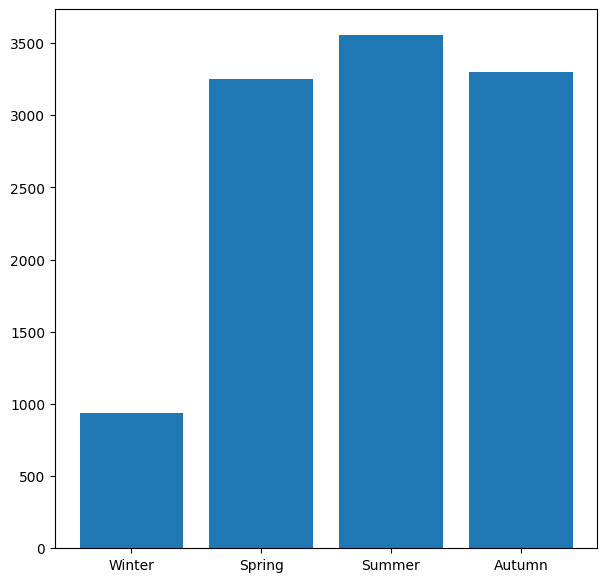

In [ ]:
seasons = Bike_df['Seasons']
Rented_Bike_Count = Bike_df['Rented Bike Count']
 
# Figure Size
fig = plt.figure(figsize =(7, 7))
 
# Horizontal Bar Plot
plt.bar(seasons, Rented_Bike_Count)

 
# Show Plot
plt.show()

From the above oberservation:

> The maximum bikes were rented in summer i.e.3500 followed by autumn and spring whereas the minimum bikes were rented in winter which is around 900.


Yes    8465
No      295
Name: Functioning Day, dtype: int64


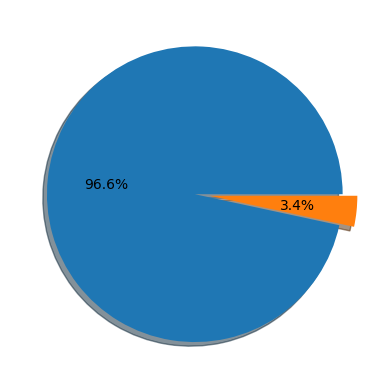

In [ ]:
#Total functioning day

func_day = Bike_df['Functioning Day'].value_counts()
print(func_day)
#creating plot
plt.pie(func_day, shadow  = True, autopct='%1.1f%%',explode = (0,0.1))

plt.show()

From above obeservation:

> The total functioning day were 8467 i.e. 96.6% and holidays were around 295 i.e. 3.4%.



2018    8016
2017     744
Name: Year, dtype: int64


<Axes: xlabel='Year', ylabel='count'>

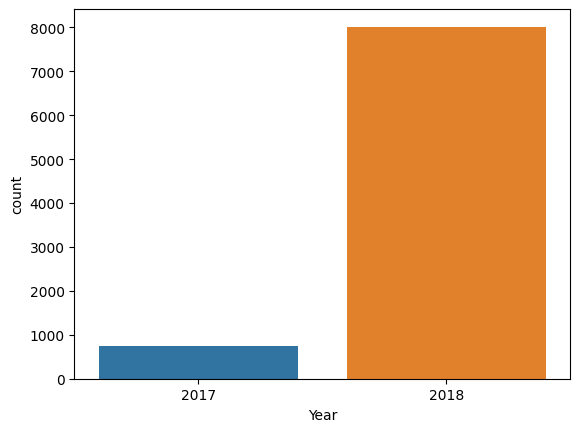

In [ ]:
#data according to year columns 

year = Bike_df['Year'].value_counts()
print(year)

sns.countplot(x ='Year',  data = Bike_df)

In [ ]:
#Creating a function that performs a groupby operation and returns a dataframe for analysis
def RBC_analysis(col):
  return Bike_df.groupby(col)['Rented Bike Count'].sum().reset_index()

In [ ]:
#Seasons column
seas_col = RBC_analysis('Seasons')
seas_col

,Seasons,Rented Bike Count
0,Autumn,1790002
1,Spring,1611909
2,Summer,2283234
3,Winter,487169


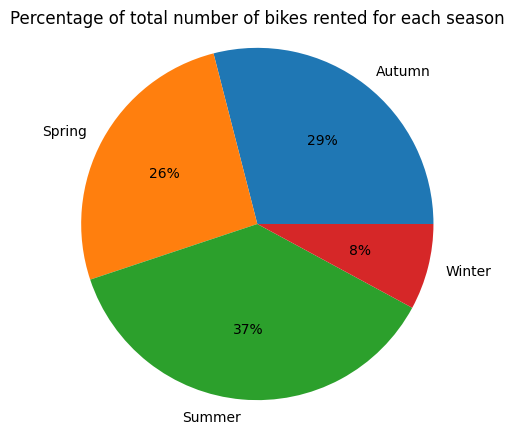

In [ ]:
#Creating the pie chart visualisation for seasons column
plt.figure(figsize=(5,5))
rc_list = list(seas_col['Rented Bike Count'])
seas_list = list(seas_col['Seasons']) 


plt.pie(rc_list,labels=seas_list,autopct='%0.0f%%')
plt.title("Percentage of total number of bikes rented for each season")
plt.axis("equal")  
plt.show()

From above observation :
> As we can see that summer has the highest number of bikes rented, 37%. This could be because of the vacation mood created in summer and also the increase in the number of tourists. Winter however is the season where the least number of bikes are rented, 8%.



In [ ]:
week_day_count = Bike_df['Weekday'].value_counts()
week_day_count

Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: Weekday, dtype: int64

<Axes: xlabel='Weekday', ylabel='count'>

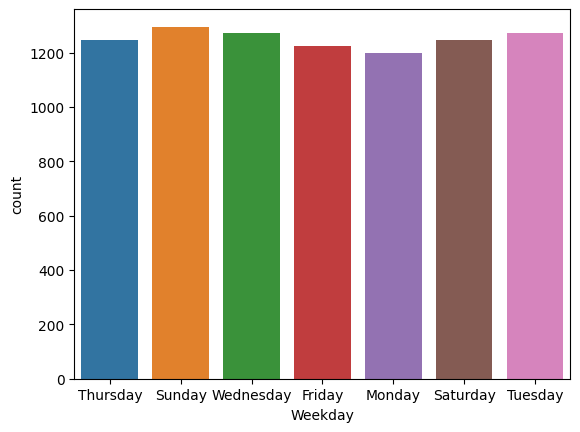

In [ ]:
#data according to Weekday 

weekday = Bike_df['Weekday'].value_counts()

sns.countplot(x ='Weekday',  data = Bike_df)

From above observation: 


> Maximum number of booking is done on Sunday and Tuesday whereas minimum number of booking is done on monday. 



In [ ]:
#wewkday column
wday_col = RBC_analysis('Weekday')
wday_col

,Weekday,Rented Bike Count
0,Friday,898966
1,Monday,863563
2,Saturday,911475
3,Sunday,798295
4,Thursday,928267
5,Tuesday,862877
6,Wednesday,908871


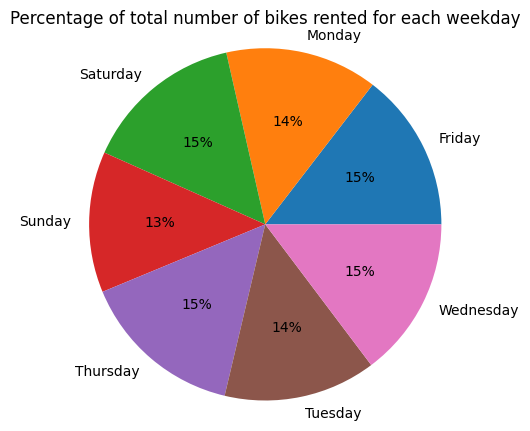

In [ ]:
plt.figure(figsize=(5,5))
rc_list = list(wday_col['Rented Bike Count'])
wday_list = list(wday_col['Weekday']) 


plt.pie(rc_list,labels=wday_list,autopct='%0.0f%%')
plt.title("Percentage of total number of bikes rented for each weekday")
plt.axis("equal")  
plt.show()

In [ ]:
#Creating a visualisation to analyse the number of bikes rented for different temperatures
tmp_bike = RBC_analysis('Temperature(°C)')
tmp_bike

,Temperature(°C),Rented Bike Count
0,-17.8,322
1,-17.5,291
2,-17.4,64
3,-16.9,36
4,-16.5,96
...,...,...
541,38.0,1184
542,38.7,475
543,39.0,1033
544,39.3,531


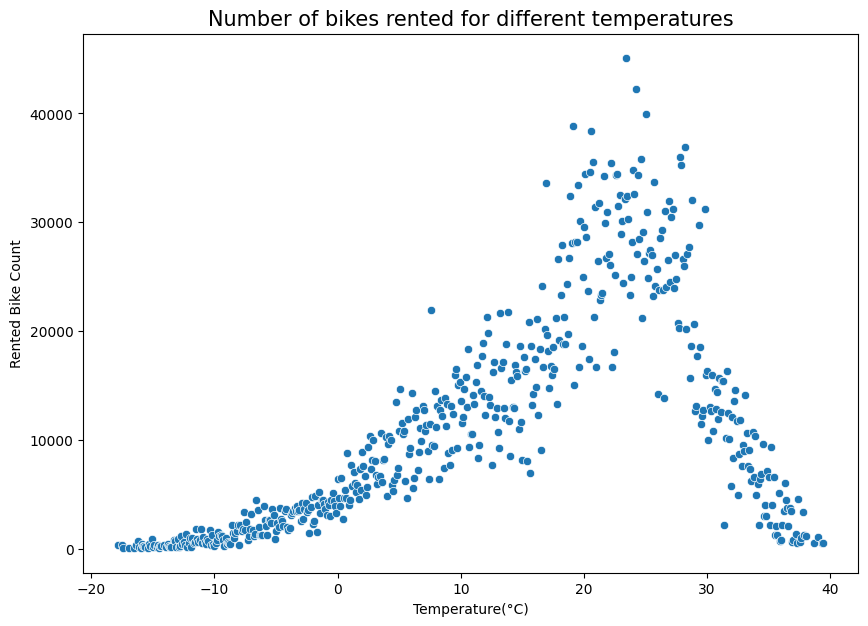

In [ ]:
#Creating a visualisation for different temperatures
plt.figure(figsize=(10,7))
sns.scatterplot(data=tmp_bike,x='Temperature(°C)',y='Rented Bike Count')
plt.title('Number of bikes rented for different temperatures',size=15)
plt.show()

From above observation:


> Maximum Bike were rented between 10(°C) to 30(°C) from this we can clearly say that people generally book the bike when temperature is normal.



In [ ]:
#Creating a visualisation to analyse the number of bikes rented for different temperatures
Hum_col = RBC_analysis('Humidity(%)')
Hum_col

,Humidity(%),Rented Bike Count
0,0,6930
1,10,1315
2,11,1986
3,12,2032
4,13,4353
...,...,...
85,94,13669
86,95,12146
87,96,18962
88,97,28730


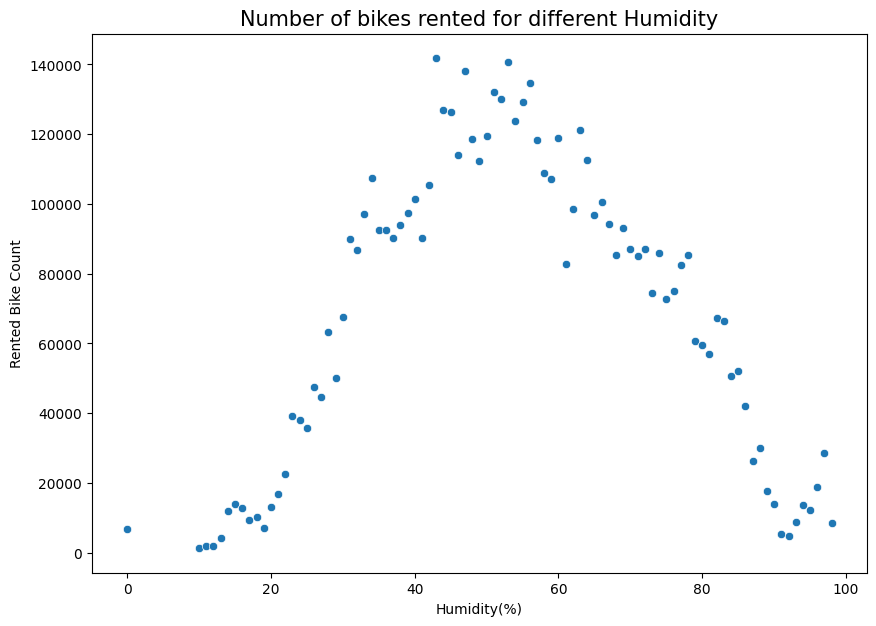

In [ ]:
#Creating a visualisation for different temperatures
plt.figure(figsize=(10,7))
sns.scatterplot(data=Hum_col,x='Humidity(%)',y='Rented Bike Count')
plt.title('Number of bikes rented for different Humidity',size=15)
plt.show()

From above observation: 

 
> people generally book a bike when the humidity(%) lie between 20 to 80.



In [ ]:
#year columns

year_col = RBC_analysis('Year')
year_col

,Year,Rented Bike Count
0,2017,185330
1,2018,5986984


In [ ]:
#Holiday according to seasons

Holiday_acc_to_seasons = Bike_df.groupby(['Seasons','Holiday']).size().unstack(fill_value=0)
Holiday_acc_to_seasons

Holiday,Holiday,No Holiday
Seasons,,
Autumn,120,2064
Spring,72,2136
Summer,48,2160
Winter,192,1968


In [ ]:
#Holiday according to weekday

Holiday_acc_to_weekday = Bike_df.groupby(['Weekday','Holiday']).size().unstack(fill_value=0)
Holiday_acc_to_weekday

Holiday,Holiday,No Holiday
Weekday,,
Friday,72,1152
Monday,96,1104
Saturday,48,1200
Sunday,72,1224
Thursday,24,1224
Tuesday,48,1224
Wednesday,72,1200


In [ ]:
#Hour columns

Hour_col = RBC_analysis('Hour')
Hour_col

,Hour,Rented Bike Count
0,0,197633
1,1,155557
2,2,110095
3,3,74216
4,4,48396
5,5,50765
6,6,104961
7,7,221192
8,8,370731
9,9,235784


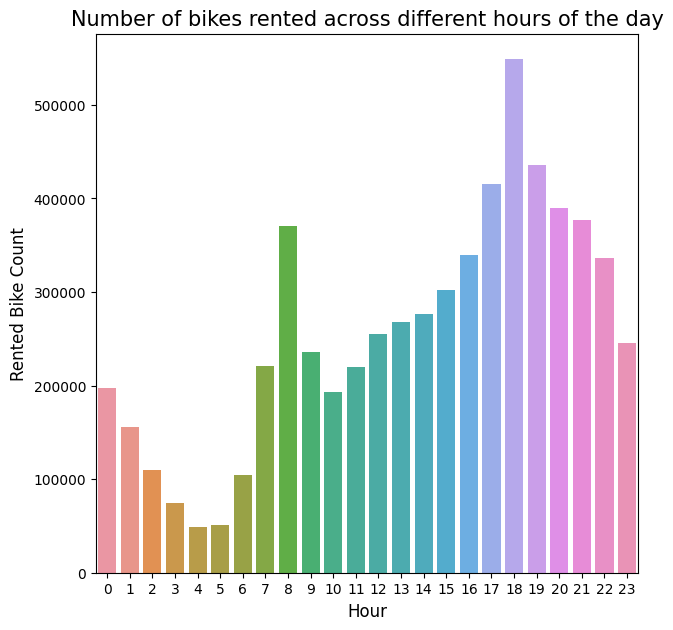

In [ ]:
#Creating a visualisation for different hours of the day
plt.figure(figsize=(7,7))
sns.barplot(data=Hour_col,x='Hour',y='Rented Bike Count')
plt.title('Number of bikes rented across different hours of the day',size=15)
plt.xlabel('Hour',size=12)
plt.ylabel('Rented Bike Count',size=12)
plt.show()

From above observation:


> It is clearly visible that most of the booking are in working over. We can say that people use them from home to office and office to home.



# OUTLIERS

In data analytics, outliers are values within a dataset that vary greatly from the others—they’re either much larger, or significantly smaller. Outliers may indicate variabilities in a measurement, experimental errors, or a novelty.

In [ ]:
#list of columns having outliers 

outliers_columns = list(set(Bike_df.describe().columns)-{'Rented Bike Count','Hour','Day','Year','Month'})
outliers_columns

['Temperature(°C)',
 'Humidity(%)',
 'Visibility (10m)',
 'Snowfall (cm)',
 'Dew point temperature(°C)',
 'Wind speed (m/s)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)']

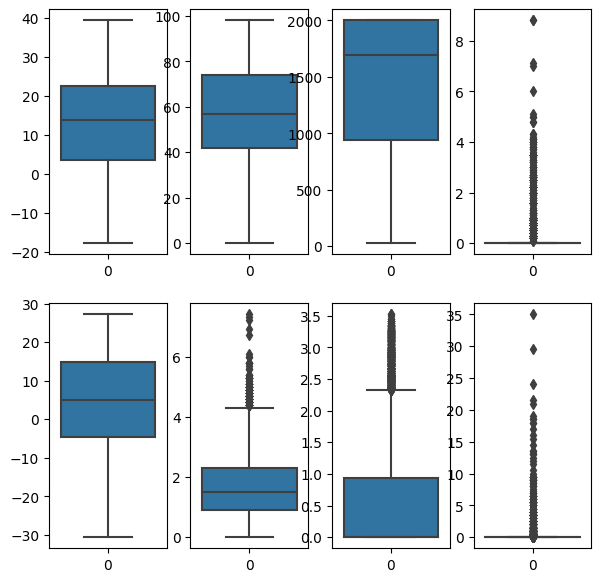

In [ ]:
#creatig boxplot for detecting columns with outliers 

plt.figure(figsize = (7,7))
for index, item in enumerate(outliers_columns):
  plt.subplot(2,4,index+1)
  sns.boxplot(Bike_df[item])



> Here we can see that the columns that contain outliers:Rainfall,Snowfall,Windspeed and Solar Radiation.



In [ ]:
#Creating a list of columns that contains outliers
out_col = ['Rainfall(mm)','Wind speed (m/s)','Snowfall (cm)','Solar Radiation (MJ/m2)']
out_col

['Rainfall(mm)',
 'Wind speed (m/s)',
 'Snowfall (cm)',
 'Solar Radiation (MJ/m2)']

In [ ]:
#inter-quantile range for outliers columns 

Q1 = Bike_df[out_col].quantile(0.25)
Q3 = Bike_df[out_col].quantile(0.75)
IQR = Q3 - Q1
IQR

Rainfall(mm)               0.00
Wind speed (m/s)           1.40
Snowfall (cm)              0.00
Solar Radiation (MJ/m2)    0.93
dtype: float64

In [ ]:
# Upper and lower fence for removal of outliers

u_fence = Q3 +(1.5 * IQR)
l_fence = Q1 - (1.5 * IQR)

#detection and removing of outliers

Bike_df[out_col] = Bike_df[out_col][~((Bike_df[out_col] < l_fence) | (Bike_df[out_col] > u_fence))]

In [ ]:
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8599 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8119 non-null   float64
 8   Rainfall(mm)               8232 non-null   float64
 9   Snowfall (cm)              8317 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Year                       8760 non-null   int64



> Due to outlier deletion, some null values have been created in these 4 columns i.e.'Rainfall(mm)', 'Wind speed (m/s)', 'Snowfall (cm)', 'Solar Radiation (MJ/m2)'.



 Imputing them with the median value of each column.

In [ ]:
#handling the null values created by outliers 

def handling_null(out_col):
  for col in out_col:
    Bike_df[col].fillna(Bike_df[col].median(),inplace = True)


#calling the imputing function
handling_null(out_col)

#lets check wheather imputation is successfull or not 

Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Year                       8760 non-null   int64

# FEATURE ENCODING 

In [ ]:
#Encoding season column 

Bike_df['Winter'] = np.where(Bike_df['Seasons']=='Winter', 1, 0)
Bike_df['Summer'] = np.where(Bike_df['Seasons']=='Summer', 1, 0)
Bike_df['Spring'] = np.where(Bike_df['Seasons']=='Spring', 1, 0)
Bike_df['Autumn'] = np.where(Bike_df['Seasons']=='Autumn', 1, 0)

In [ ]:
#removing seasons columns as we don't require it now

Bike_df.drop(columns = ['Seasons'], axis = 1, inplace = True)

Bike_df.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Year,Month,Day,Weekday,Winter,Summer,Spring,Autumn
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,2017,1,12,Thursday,1,0,0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,2017,1,12,Thursday,1,0,0,0


In [ ]:
#Encoding holiday column

Bike_df['Holiday'] = np.where(Bike_df['Holiday']=='Holiday',1,0)

In [ ]:
#Encoding Functioning Day column

Bike_df['Functioning Day'] = np.where(Bike_df['Functioning Day']=='Functioning Day',1,0)

In [ ]:
#Dropping weekday columns as we dont require it now. 

Bike_df.drop(columns = ['Weekday'], axis = 1, inplace = True)

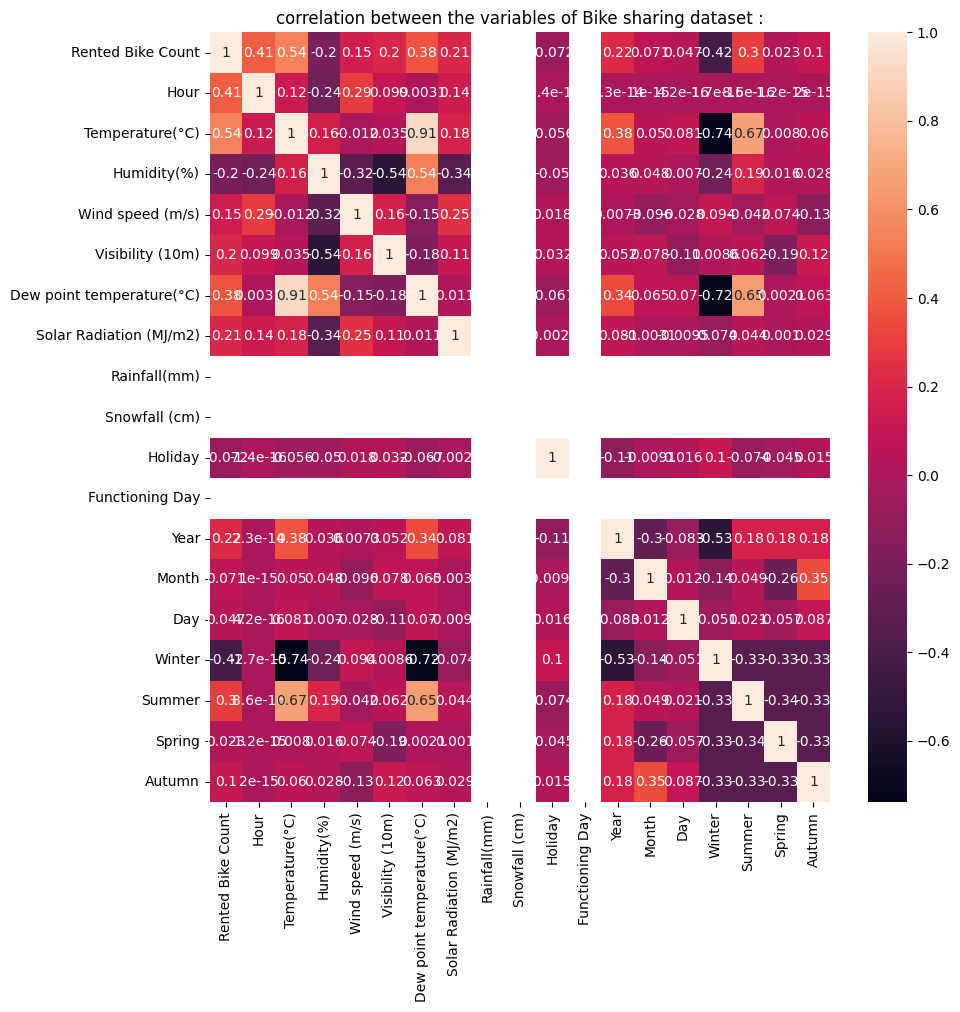

In [ ]:
# correlation 

plt.figure(figsize = (10,10))
sns.heatmap(Bike_df.corr(), annot = True)
plt.title('correlation between the variables of Bike sharing dataset :')
plt.show()



> Lets eleminate dew point temperature as its has high collinarity in the dataset


In [ ]:
Bike_df.drop(columns = ['Dew point temperature(°C)'], axis = 1, inplace = True)

In [ ]:
#dropping the unnecessary columns

Bike_df.drop(columns = {'Year','Month','Day'},inplace = True, axis = 1)

#REMOVING MULTICOLLINEARITY

Multicollinearity is when two independent variables are highly correlated to each other.

Multicollinearity affects the accuracy of the regression models, and therefore we will check if we have multicollinearity in our dataset and solve it by removing columns which cause multicollinearity.

Note: I will check the multicollinearity of our dataset by using the variance inflation factor. Accepted VIF is less than 10.

In [ ]:
#Multicollinearity using VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor


#list of independent variable'
ind_var = list(set(Bike_df.columns)-{'Rented Bike Count'})

In [ ]:
#caluculating the VIF 
def cal_vif(X):
  vif = pd.DataFrame()
  vif['Columns'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return(vif)

In [ ]:
#calculating the VIF for independent variable 

cal_vif(Bike_df[ind_var])

,Columns,VIF
0,Autumn,16.181531
1,Summer,21.360075
2,Spring,14.439976
3,Functioning Day,NaN
4,Winter,12.253762
5,Hour,1.180201
6,Temperature(°C),4.420937
7,Humidity(%),2.041080
8,Visibility (10m),1.628647
9,Snowfall (cm),NaN


In [ ]:
#Dropping the columns i.e. Snowfall (cm), Functioning Day, Rainfall(mm), Winter
Bike_df.drop(columns = {'Snowfall (cm)','Functioning Day','Rainfall(mm)','Winter'},inplace = True, axis = 1)

In [ ]:
#Creating list of remaining independent variable 

ind_var  = list(set(Bike_df.columns)-{'Rented Bike Count'})

#calculating VIF for remaining columns

cal_vif(Bike_df[ind_var])

,Columns,VIF
0,Autumn,4.437701
1,Summer,9.167621
2,Spring,3.927898
3,Hour,4.025525
4,Temperature(°C),9.481974
5,Humidity(%),5.401113
6,Visibility (10m),5.216380
7,Wind speed (m/s),4.707847
8,Solar Radiation (MJ/m2),1.598384
9,Holiday,1.070809


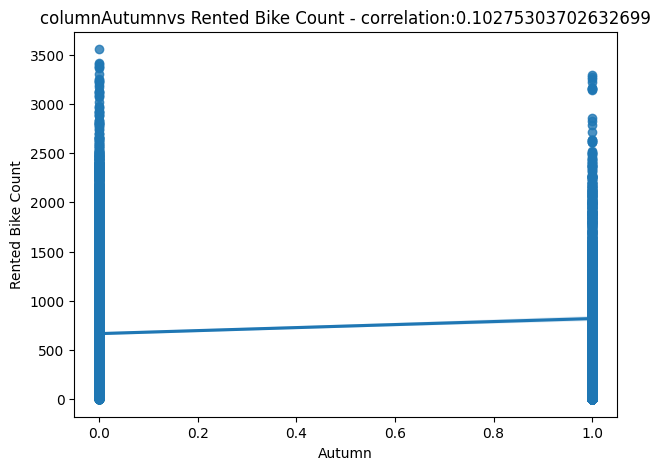

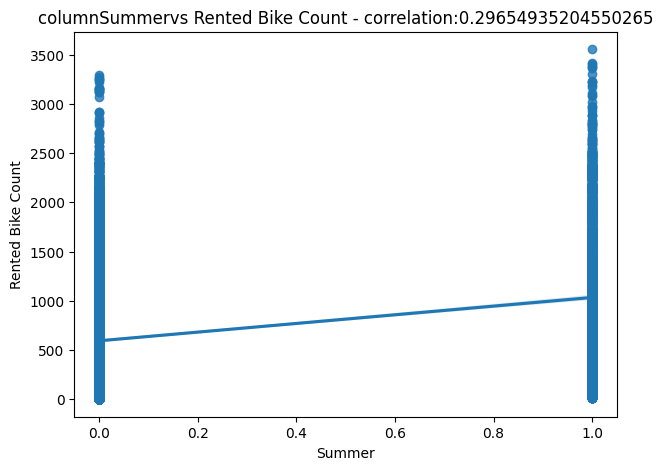

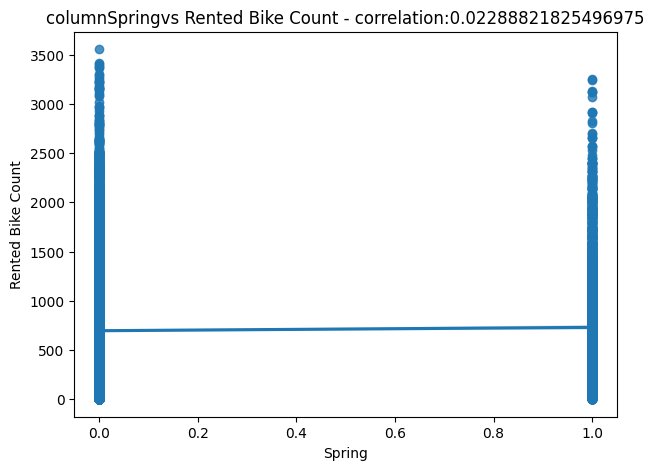

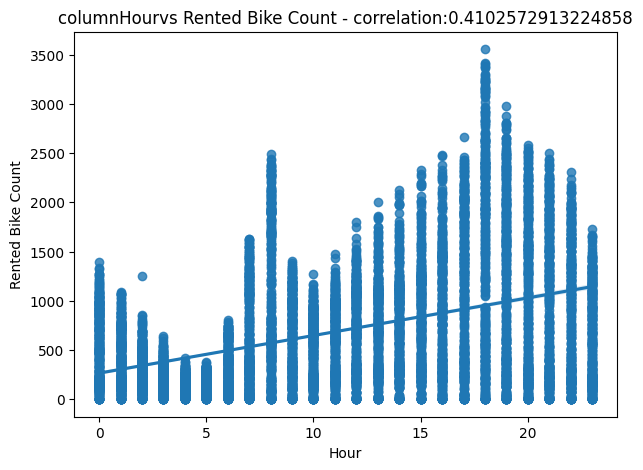

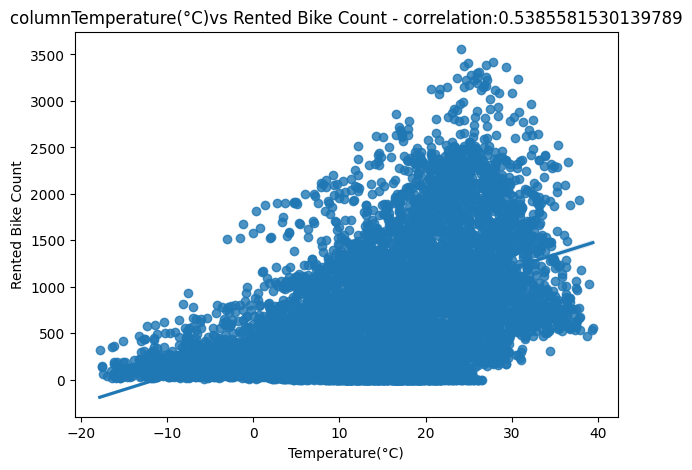

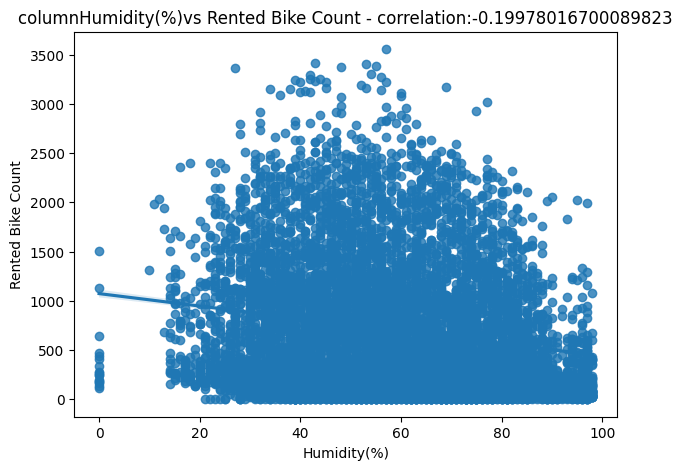

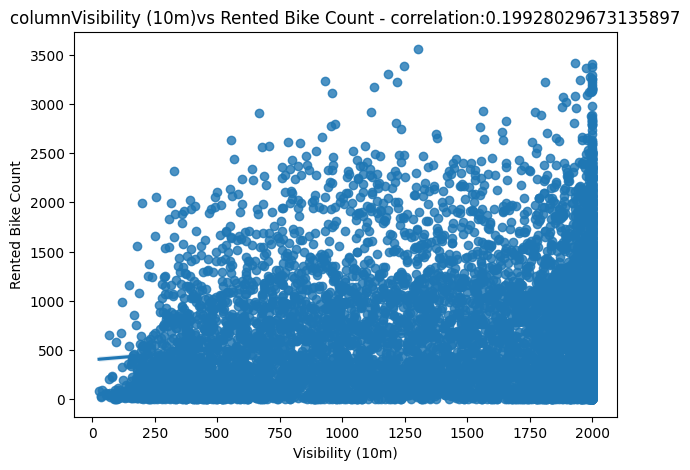

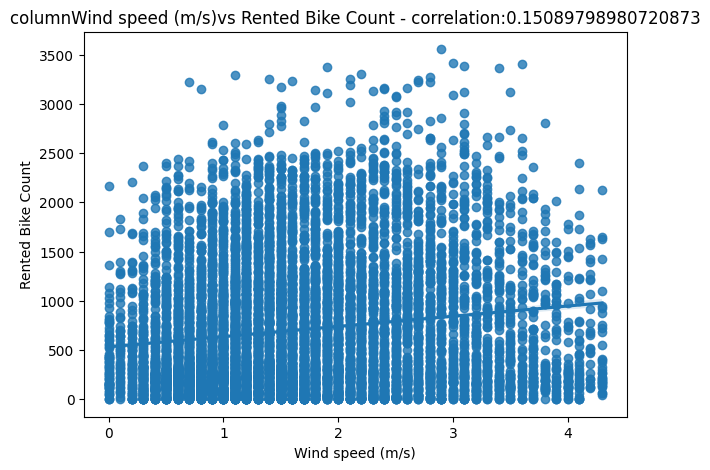

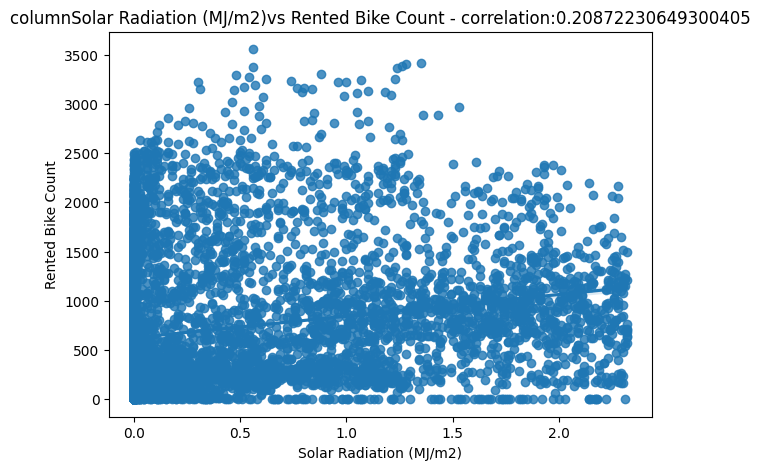

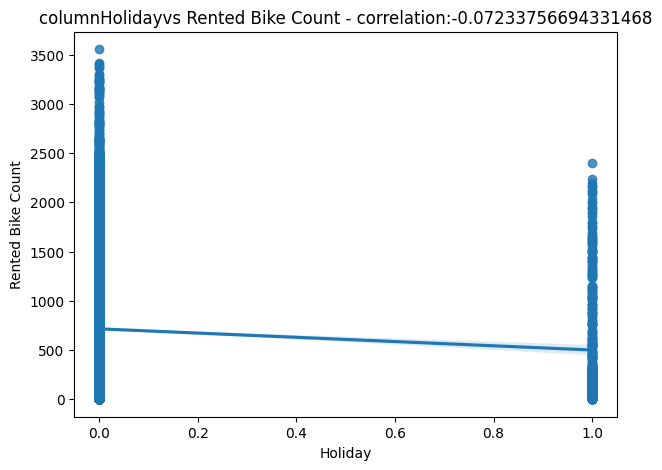

In [ ]:
#Obtainf correlation between independent and dependent variable 
#printing the regresssion plot for all the features

for col in ind_var:
  fig, ax = plt.subplots(figsize = (7,5))
  sns.regplot(x = Bike_df[col], y = Bike_df['Rented Bike Count'])
  corr = Bike_df[col].corr(Bike_df['Rented Bike Count'])
  ax.set_title('column' +col+'vs Rented Bike Count - correlation:' + str(corr))



> We can see that all the remaining columns that we have, have a linear relationship with the dependent variable. So we have satisfied the assumption and therefore we are good to go.


#PRE-PROCESSING OF DATA

In [ ]:
# Data spliting and value assigning to variables for Reggression

X = Bike_df.drop(columns = ['Rented Bike Count'] , axis = 1)
y = np.sqrt(Bike_df['Rented Bike Count'])

In [ ]:
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Holiday,Summer,Spring,Autumn
0,0,-5.2,37,2.2,2000,0.0,0,0,0,0
1,1,-5.5,38,0.8,2000,0.0,0,0,0,0
2,2,-6.0,39,1.0,2000,0.0,0,0,0,0
3,3,-6.2,40,0.9,2000,0.0,0,0,0,0
4,4,-6.0,36,2.3,2000,0.0,0,0,0,0


In [ ]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

In [ ]:
#Train test spliting

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size = 0.25, random_state = 0)
print(X_train.shape)
X_test.shape

(6570, 10)


(2190, 10)

**Feature Scaling**

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

Two ways of feature scaling:

Min max normalization

Standardisation

 we will be useing the standardisation method with the help of the StandardScaler() function.

In [ ]:
#Feature scaling 
from sklearn.preprocessing import MinMaxScaler,StandardScaler


#Creating object for the StandardScaler function
scaler = StandardScaler()

#Standardizing the independent variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#Overview of what a dataframe looks like after standardizing
X_train

array([[ 1.66765533, -0.74954694,  1.22697808, ..., -0.57582707,
        -0.5807482 ,  1.72819284],
       [ 0.36544652,  0.93615918, -0.54181953, ..., -0.57582707,
         1.72191666, -0.57863913],
       [ 1.08889586, -1.65916064, -1.22968527, ..., -0.57582707,
        -0.5807482 , -0.57863913],
       ...,
       [-0.06862308,  1.06133538, -0.05048686, ...,  1.73663249,
        -0.5807482 , -0.57863913],
       [-1.66021162, -0.37401835,  0.04777967, ..., -0.57582707,
         1.72191666, -0.57863913],
       [ 1.23358573, -0.47415931,  1.22697808, ..., -0.57582707,
         1.72191666, -0.57863913]])

# MODEL IMPLEMENTATION

In [ ]:


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

### LINEAR REGRESSION

In machine learning, linear regression is one of the easiest and most popular algorithms. It is a statistical method used for predictive analysis that makes predictions for continuous or numeric variables such as sales, salary, age, product price, etc1. Linear regression shows a linear relationship between a dependent variable and one or more independent variables1.

Linear regression can be divided into two types: simple linear regression, which uses a single independent variable to predict the value of a numerical dependent variable; and multiple linear regression, which uses more than one independent variable to predict the value of a numerical dependent variable



In [ ]:
#Training the linear regression model
lr_model = LinearRegression().fit(X_train,y_train)

#Checking the score of the linear regression model
lr_model.score(X_train,y_train)

0.4827923516054775

In [ ]:
#Checking the coefficient values of the linear regression model
lr_model.coef_

array([ 3.4929119 ,  4.43820835, -3.25571533, -0.00611553,  0.20455542,
        0.1619329 , -0.7878579 ,  3.1553882 ,  2.44910325,  2.72281164])

In [ ]:
#Predicting the value of the dependent variable for train and test dataset
Y_train_pred_lr = lr_model.predict(X_train)
Y_test_pred_lr = lr_model.predict(X_test)

In [ ]:
#Creating a function to calculate and display the evaluation metrics for the model
def eval_metrics(y_pred,model):
  print("The evaluation metrics for "+model+" are given as:")
  MSE  = mean_squared_error(y_test,y_pred)      #Mean squared error for test set
  print("MSE :" , MSE)
  
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)
  
  r2_test = r2_score(y_test,y_pred)             #r2 score for prediction on test set
  print("R2 :" ,r2_test)
  
  a_r2_test = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))     #adjusted r2 score for test set
  print("Adjusted R2 :",a_r2_test)

#Calculating the evaluation metrics for Linear Regression
eval_metrics(Y_test_pred_lr,'Linear Regression')

The evaluation metrics for Linear Regression are given as:
MSE : 86.39593253656746
RMSE : 9.294941233626357
R2 : 0.4530740036673806
Adjusted R2 : 0.4505640174519946


### RIDGE REGRESSION

Ridge regression is a regularized version of linear regression. It enhances regular linear regression by slightly changing its cost function, which results in less overfit models1. Ridge regression works by increasing the bias to improve variance. This works by changing the slope of the line. The model performance might be a little poor on the training set but it will perform consistently well on both the training and testing dataset2.

Ridge regression helps us to reduce only the overfitting in the model while keeping all the features present in the model. It reduces the complexity of the model by shrinking the coefficients3.

In [ ]:

#Training the ridge regression model using GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1,0.001,10,20,35,60,70,100,800,1200]}
ridge_model_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_model_grid.fit(X_train,y_train)

print(f'The best value for alpha in ridge regression through GridSearchCV is found to be {ridge_model_grid.best_params_}')

print(f'\nUsing {ridge_model_grid.best_params_} as the value for aplha gives us a negative mean squared error of: {ridge_model_grid.best_score_}')


The best value for alpha in ridge regression through GridSearchCV is found to be {'alpha': 35}

Using {'alpha': 35} as the value for aplha gives us a negative mean squared error of: -80.01666506008738


In [ ]:
ridge_model=Ridge(alpha=35).fit(X_train,y_train)
Y_test_pred_ridge = ridge_model.predict(X_test)


#Calculating the evaluation metrics for Ridge Regression
eval_metrics(Y_test_pred_ridge,'Ridge Regression')


The evaluation metrics for Ridge Regression are given as:
MSE : 86.39135788258079
RMSE : 9.29469514737201
R2 : 0.4531029633315231
Adjusted R2 : 0.450593110019598




> As we can see there is only a very slight difference between the results achieved through Linear regression and Ridge regression



### RANDOM FOREST REGRESSOR

In [ ]:
#Fitting Random Forest model on the dataset with appropriate paramter values

rf_model = RandomForestRegressor(bootstrap=True,max_depth=20,min_samples_leaf=2,min_samples_split=4,n_estimators=15).fit(X_train,y_train)
Y_test_pred_rf = rf_model.predict(X_test)

In [ ]:
#Calculating the evaluation metrics for Random Forest Regression

eval_metrics(Y_test_pred_rf,'Random Forest Regression')


The evaluation metrics for Random Forest Regression are given as:
MSE : 54.251911343148066
RMSE : 7.365589680612684
R2 : 0.6565604445354938
Adjusted R2 : 0.6549843107334539



> As we can see the quality of model prediction has drastically improved.





> Results from ML models:


1.   Random Forest Regression is the best performing model with an r2 score of 0.65.
2.   linear and ridge regression both have r2 score of 0.45.




# MODEL EXPLAINABILITY

Model explainability refers to the concept of being able to understand the machine learning model. For example – If a healthcare model is predicting whether a patient is suffering from a particular disease or not. The medical practitioners need to know what parameters the model is taking into account or if the model contains any bias. So, it is necessary that once the model is deployed in the real world. Then, the model developers can explain the model.

Popular techniques for model explainability:

LIME

SHAP

ELI-5

In this project I'll be using SHAP for model explainability. Among the various methods in SHAP I'll be using the SHAP summary plot, which plots features/columns in order of their impact on the predictions and also plots the SHAP values.

**ABOUT SHAP**

SHAP (SHapley Additive exPlanations) is a game-theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions1.

SHAP is a mathematical method to explain the predictions of machine learning models. It is based on the concepts of game theory and can be used to explain the predictions of any machine learning model by calculating the contribution of each feature to the prediction2.

In [ ]:
#importing the shap library
!pip install shap

#initailising javascript for visualisation of shap
import shap

# Need to load JS visualisation in the notebook
shap.initjs()

#Creating a function to plot the shap summary plot
def shap_summary(model):
   explainer_shap = shap.Explainer(model=model, masker=X_train)
   shap_values = explainer_shap.shap_values(X_train)
   shap.summary_plot(shap_values,X_train,feature_names=X.columns)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.1 MB/s eta 0:00:00


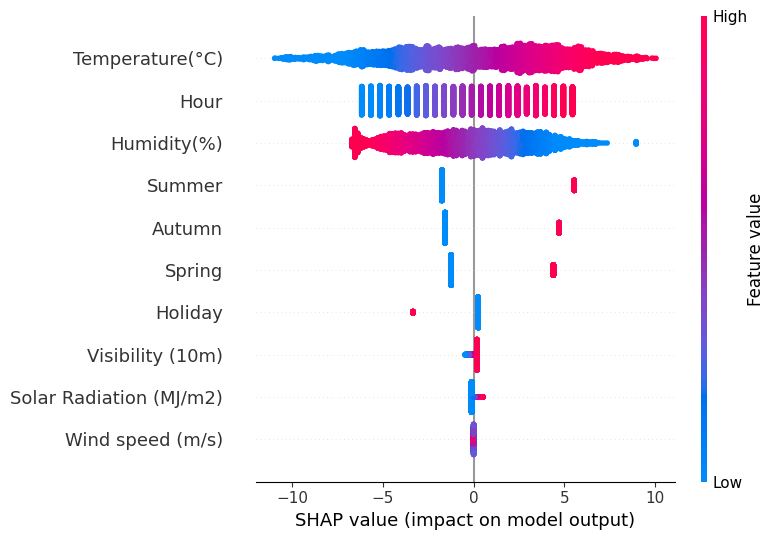

In [ ]:
#Plotting shap summary plot for linear regression
shap_summary(lr_model)

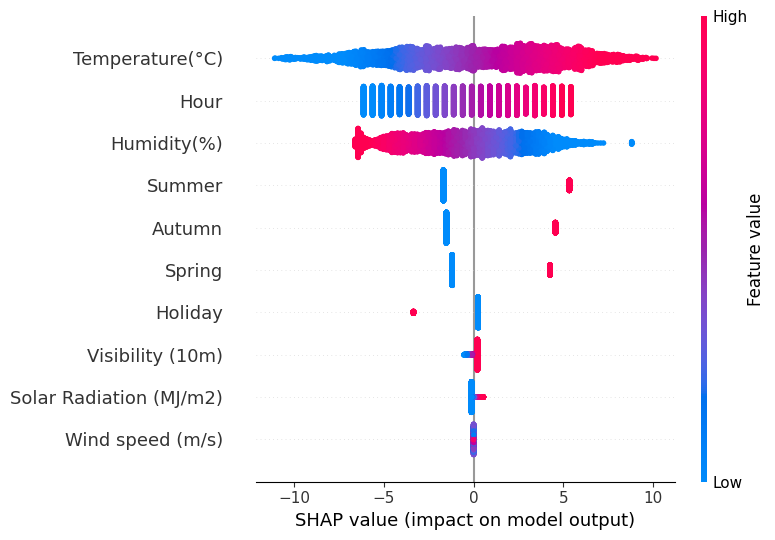

In [ ]:
#Plotting shap summary plot for Ridge regression
shap_summary(ridge_model)

 98%|===================| 6411/6570 [00:43<00:01]       

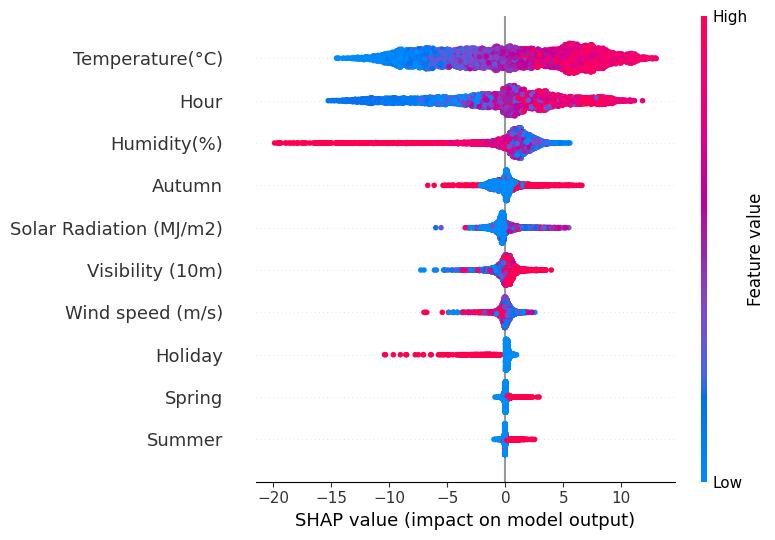

In [ ]:
#Plotting shap summary plot for Random forest regression model
explainer_shap = shap.Explainer(model=rf_model, masker=X_train)
shap_values = explainer_shap.shap_values(X_train,check_additivity=False)
shap.summary_plot(shap_values,X_train,feature_names=X.columns)

> We see that different importance or impact power is given to the features by each model and that defines how well the model performs on prediction. Random forest gives almost all the features a significant impact power and therefore it performs the best out of all the 3 models.

> By looking at the SHAP summary plot for each model, we can figure out the feature importance and also its impact power by understanding the SHAP values.

> All 3 models have been explained with the help of SHAP library.

> Temperature and Hour are the two most important factors according to all the models.



# SUMMARY

> EDA insights:

* The maximum bikes were rented in summer i.e.3500 followed by autumn and spring whereas the minimum bikes were rented in winter which is around 900

* The total functioning day were 8467 i.e. 96.6% and holidays were around 295 i.e. 3.4%.

*  Summer has the highest number of bikes rented, 37%. This could be because of the vacation mood created in summer and also the increase in the number of tourists. Winter however is the season where the least number of bikes are rented, 8%.

* Maximum number of booking is done on Sunday and Tuesday whereas minimum number of booking is done on monday.

* Maximum Bike were rented between 10(°C) to 30(°C) from this we can clearly say that people generally book the bike when temperature is normal.

* Most number of bikes are rented when there is no snowfall or rainfall.


* Majority of the bikes are rented for a humidity percentage range of 20 to 80.

* The highest number of bike rentals have been done in the 18th hour, i.e 6pm, and lowest in the 4th hour, i.e 4am.

* The most of the booking are in working over. We can say that people use them from home to office and office to home.

> Results from ML models:

* Random Forest Regression is the best performing model with an r2 score of 0.65.

* All 3 models have been explained with the help of SHAP library.

* Both linear and ridge regression both have r2 score of 0.45.

* Temperature and Hour are the two most important factors according to all the models.



> Challenges faced:

* Removing Outliers.

* Encoding the categorical columns.

* Removing Multicollinearity from the dataset.

* Choosing Model explainability technique.

### GITHUB

https://Hiteshshekhawat/ML.Regression